In [1]:
import os # for filepath handling
import pandas as pd
import requests # for grabbing the dataset
import matplotlib.pyplot as plt # for plotting
from robustipy.models import OLSRobust

def get_data():
    uscrime_path = os.path.join('data', 'input', 'uscrime.txt')
    if os.path.exists(uscrime_path):
        df = pd.read_csv(uscrime_path, sep=r"\s+")
    else:
        df = pd.read_csv("https://fermin.perso.math.cnrs.fr/Files/UScrime.txt",
                         sep=r"\s+", skiprows=35, index_col=0)
        df.to_csv(uscrime_path, sep='\t')
    df = df.rename({'M': 'Males',
                    'LF': 'Labour Force',
                    'W': 'Wealth',
                    'X': 'Inequality',
                    'U1': 'Unemployment',
                    'Ex0': 'Expenditure'}, axis=1)    
    return df

In [2]:
df = get_data()
df.head()

,R,Age,Ed,Expenditure,Ex1,Labour Force,Males,N,NW,Unemployment,U2,Wealth,Inequality
0,79.1,151,91,58,56,510,950,33,301,108,41,394,261
1,163.5,143,113,103,95,583,1012,13,102,96,36,557,194
2,57.8,142,89,45,44,533,969,18,219,94,33,318,250
3,196.9,136,121,149,141,577,994,157,80,102,39,673,167
4,123.4,141,121,109,101,591,985,18,30,91,20,578,174


Output()

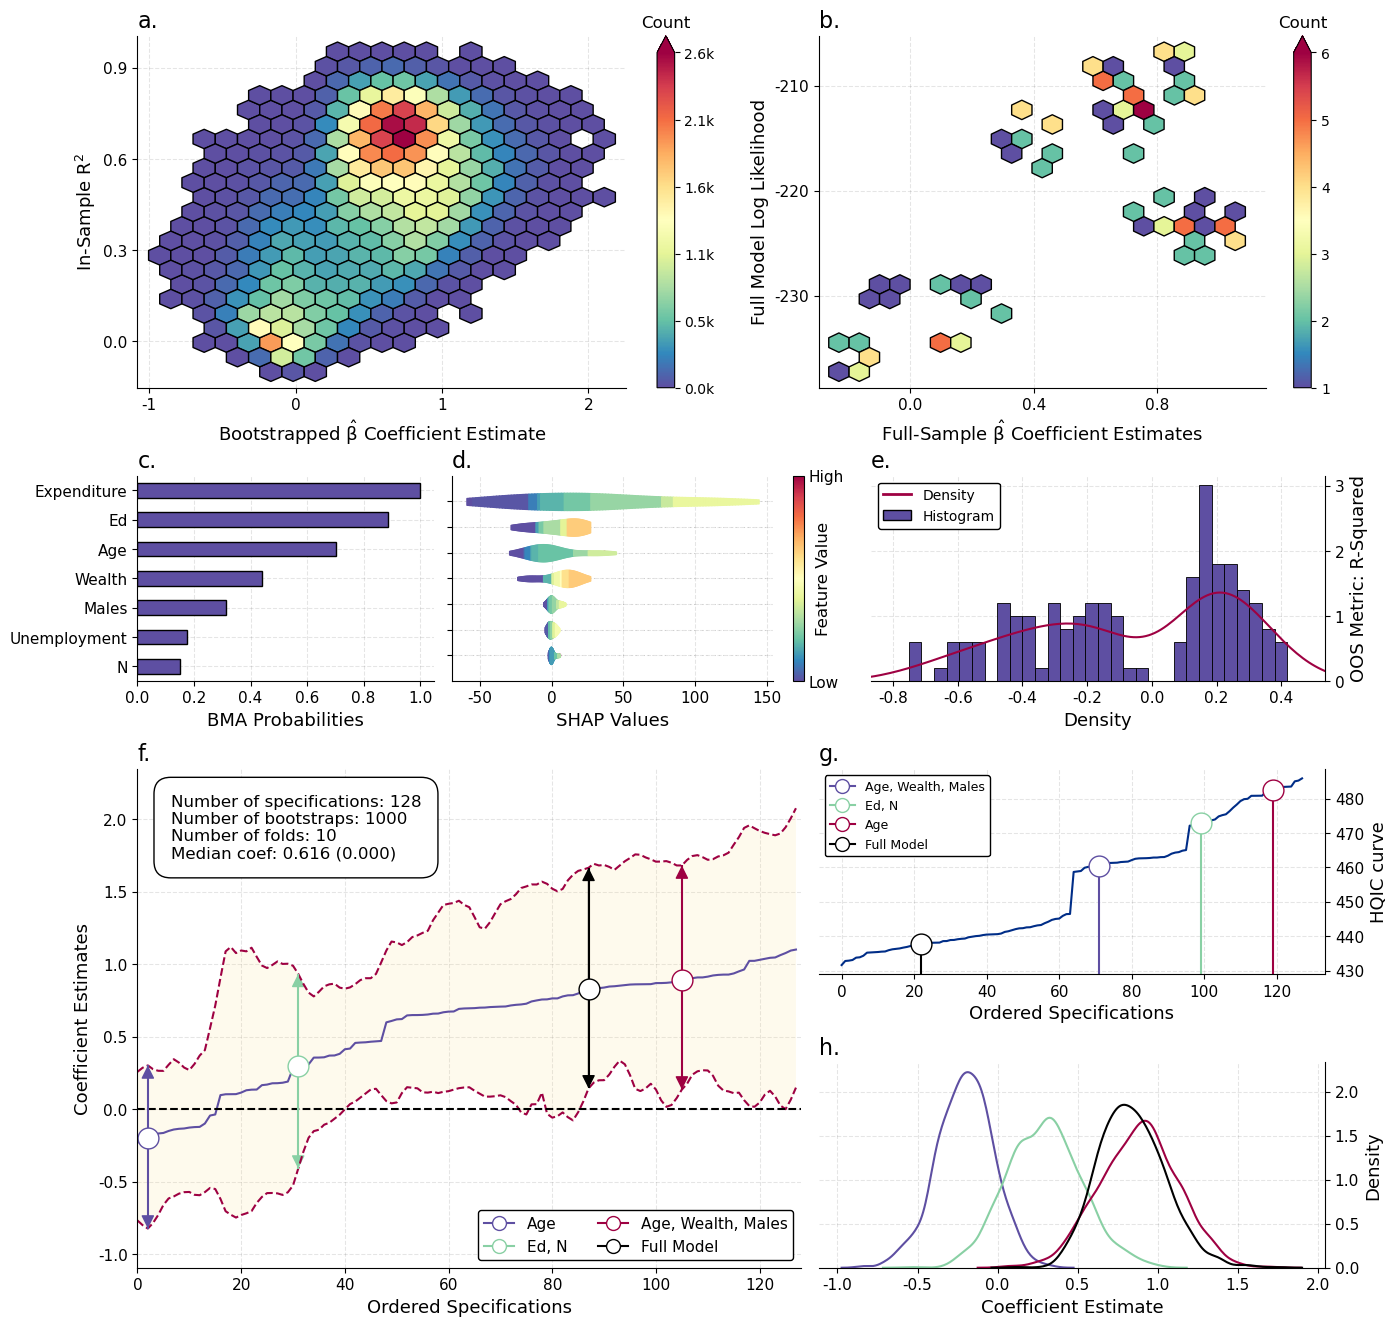

In [3]:
ehrlich_robust = OLSRobust(y=['R'], x=['Inequality'], data=df)
c = ['Expenditure', 'Age', 'Ed', 'Unemployment', 'Males', 'N', 'Wealth']
           
ehrlich_robust.fit(controls=c,
                   draws=1000,
                   kfold=10,
                   seed=192735,
                  )


ehrlich_results = ehrlich_robust.get_results()
ehrlich_results.plot(specs=[['Age'], ['Ed', 'N'],
                            ['Age', 'Males', 'Wealth']],
                     ic='hqic',
                     ext='svg',
                     project_name='union_example',
                     figsize=(16, 16)
                    )


In [4]:
ehrlich_results.summary()

1. Model Summary
Model: OLS Robust
Inference Tests: Yes
Dependent variable: R
Independent variable: Inequality
Number of possible controls: 7
Number of draws: 1000
Number of folds: 10
Number of specifications: 128
2.Model Robustness Metrics
2.1 Inference Metrics
Median beta (all specifications, no resampling): 0.6975951567908121 (p-value: 0.0)
Median beta (all bootstraps and specifications): 0.6160358038812461
Min beta (all specifications, no resampling): -0.23040559414041084
Min beta (all bootstraps and specifications): -0.9283664483280702
Max beta (all specifications, no resampling): 1.0850754511711358
Max beta (all bootstraps and specifications): -0.21194975585454756
Significant portion of beta (all specifications, no resampling): 0.75 (p-value: 0.0)
Significant portion of beta (all bootstraps and specifications): 0.7335625
Positive portion of beta (all specifications, no resampling): 0.875 (p-value: 0.0)
Positive portion of beta (all bootstraps and specifications): 0.86221875
Negat